In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

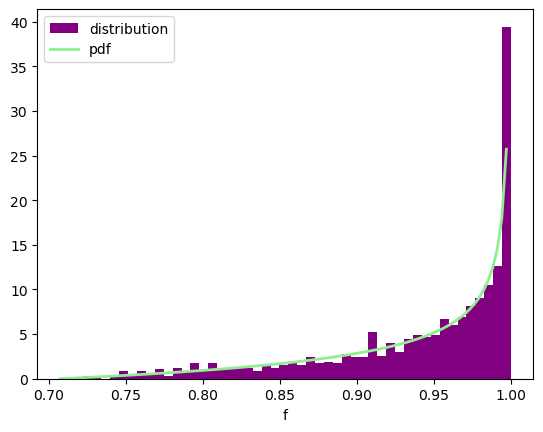

In [35]:
N_BH = 1000
mu = 1
sigma = 0.02

def f(a):
    return np.sqrt((1+np.sqrt(1-a**2))/2)
a = np.random.uniform(low=0, high=1, size=N_BH)
M = np.random.normal(loc=mu, scale=sigma, size=N_BH)
plt.hist(f(a), bins=50, color="purple", density=True, label="distribution")
x = np.linspace(1/2**0.5,1,100)[:-1]
pdff = 2*(2*x**2-1)/(1-x**2)**0.5
plt.plot(x, pdff, color="lightgreen", lw=2, label="pdf")
plt.xlabel("f")
plt.legend()

Text(0.5, 0, 'M$_{irr}$')

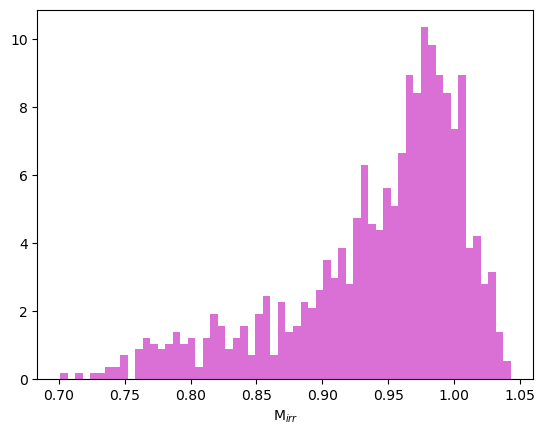

In [45]:
M_irr = M*f(a)
plt.hist(M_irr, density=True, bins=60, color="orchid")
plt.xlabel("M$_{irr}$")

In [46]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr.min(), M_irr.max(), 100)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

Text(0.5, 0, 'M$_{irr}$')

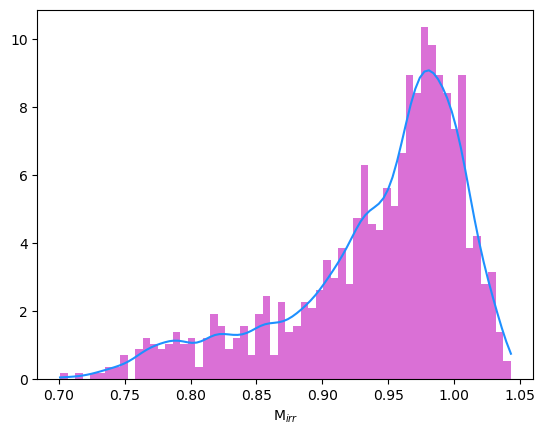

In [49]:
PDFGauss = kde_sklearn(M_irr, bandwidth=0.01, kernel="gaussian")
plt.hist(M_irr, bins=60, color="orchid", density=True)
plt.plot(xgrid, PDFGauss, color="dodgerblue")
plt.xlabel("M$_{irr}$")

In [71]:
def trend(s):
    Ms = np.random.normal(loc=mu, scale=s, size=N_BH)
    M_irrs = Ms*f(a)
    return Ms, M_irrs

Text(0.5, 0, 'M$_{irr}$')

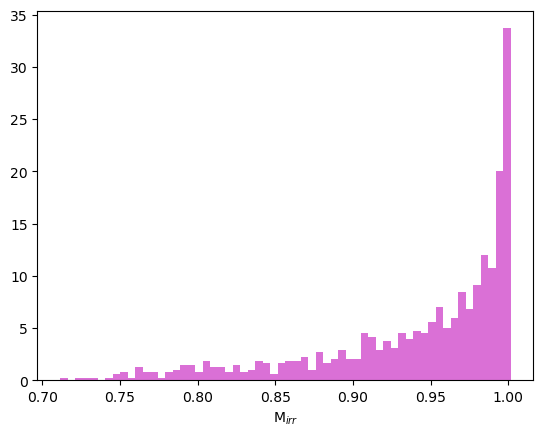

In [72]:
plt.hist(trend(0.001)[1], density=True, bins=60, color="orchid")
plt.xlabel("M$_{irr}$")
#as f

Text(0.5, 0, 'M$_{irr}$')

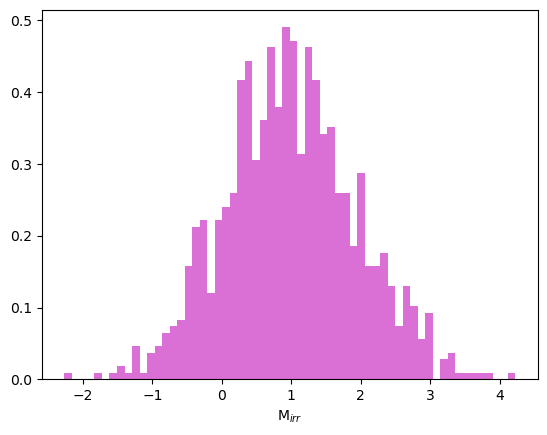

In [73]:
plt.hist(trend(1)[1], density=True, bins=60, color="orchid")
plt.xlabel("M$_{irr}$")
#Gaussian as M

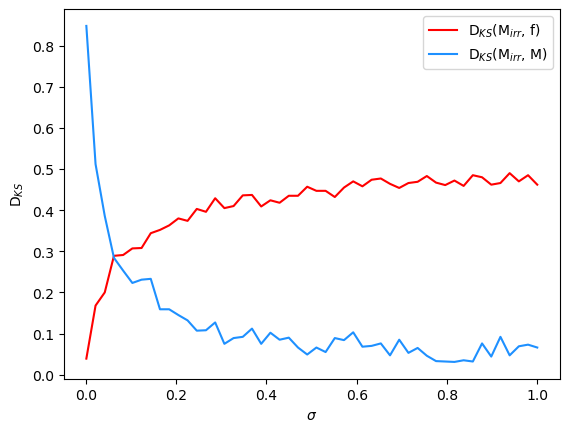

In [78]:
sigmas = np.linspace(0.001, 1, 50)
D_f = []
D_M = []
for i in range(len(sigmas)):
    D_f.append(stats.kstest(trend(sigmas[i])[1], f(a))[0])
    D_M.append(stats.kstest(trend(sigmas[i])[1], trend(sigmas[i])[0])[0])
    
plt.plot(sigmas, D_f, color="red", label="D$_{KS}$(M$_{irr}$, f)")
plt.plot(sigmas, D_M, color="dodgerblue", label="D$_{KS}$(M$_{irr}$, M)")
plt.xlabel("$\sigma$")
plt.ylabel("D$_{KS}$")
plt.legend()